In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import random
% matplotlib inline

In [2]:
data_path = "../../data/original/train.h5"
df = pd.read_hdf(data_path, key='table')
end = int(600e6)
sig = df['s'][:end]
ttf = df['ttf'][:end]
print("sig len ", len(sig))

sig len  600000000


## Signal sample

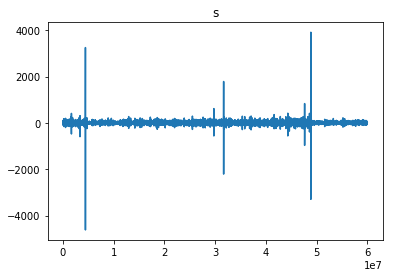

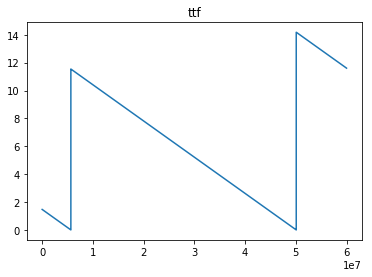

In [3]:
num_to_show = int(60e6)
plt.figure()
plt.plot(sig[:num_to_show])
plt.title('s')
plt.show()

plt.figure()
plt.plot(ttf[:num_to_show])
plt.title('ttf')
plt.show()

## Spectrogramm

In [7]:
%%time
fs = 4000000.0
# window = [10000]
nperseg = 50000
noverlap = 45000
mode = 'psd'
f, t, Sxx = signal.spectrogram(sig, fs, 
                               nperseg=nperseg,
                               noverlap=noverlap,
                               mode=mode)
print("time seg", len(t))
print("freq seg", len(f))
print("Spectr shape", Sxx.shape)
print("spectr min max mean std", Sxx.min(), Sxx.max(), Sxx.mean(), Sxx.std())

time seg 119991
freq seg 25001
Spectr shape (25001, 119991)
spectr min max mean std 1.0678162094120487e-18 3.6717707521808824 5.649800875578318e-05 0.004430666566357478
Wall time: 8min 18s


In [ ]:
%%time
end = num_to_show // (nperseg - noverlap)
print(end)
print(Sxx.shape)
# plt.figure(figsize=(14,14))

# plt.imshow(Sxx[:, :end], vmax=0.001, origin='upper', aspect='auto')
# plt.title("Spectr")
# plt.show()

plt.figure(figsize=(14,14))
smoothen = signal.convolve2d(Sxx, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
smoothen = signal.convolve2d(smoothen, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
smoothen = signal.convolve2d(smoothen, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
# plt.imshow(smoothen[:, :end], vmax=0.001, origin='upper', aspect='auto')
# plt.title("Smoothen Spectr")
# plt.show()

# plt.figure(figsize=(14,4))
# plt.plot(ttf[:num_to_show])
# plt.title('ttf')
# plt.show()

12000

## Single sample example 

In [4]:
sample_len = 150000
rnd_idx = random.randint(0, len(sig) - sample_len)
sample_sig = sig[rnd_idx: rnd_idx + sample_len]
sample_ttf = ttf[rnd_idx: rnd_idx + sample_len]

In [5]:
%%time
fs = 4000000.0
# window = [10000]
nperseg = 50000
noverlap = 45000
mode = 'psd'
f_s, t_s, Sxx_s = signal.spectrogram(sample_sig, fs, 
                               nperseg=nperseg,
                               noverlap=noverlap,
                               mode=mode)
print("time seg", len(t_s))
print("freq seg", len(f_s))
print("Spectr shape", Sxx_s.shape)
print("spectr min max mean std", Sxx_s.min(), Sxx_s.max(), Sxx_s.mean(), Sxx_s.std())

time seg 21
freq seg 25001
Spectr shape (25001, 21)
spectr min max mean std 5.449333483456693e-12 0.002390259035690663 1.363367228021122e-05 5.079729783174078e-05
Wall time: 70.2 ms


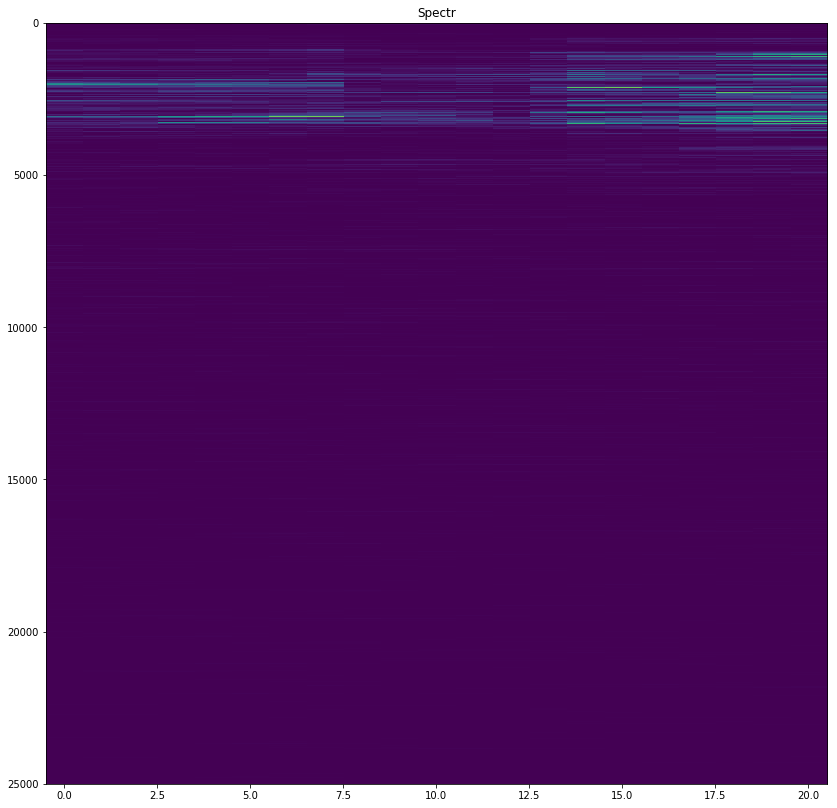

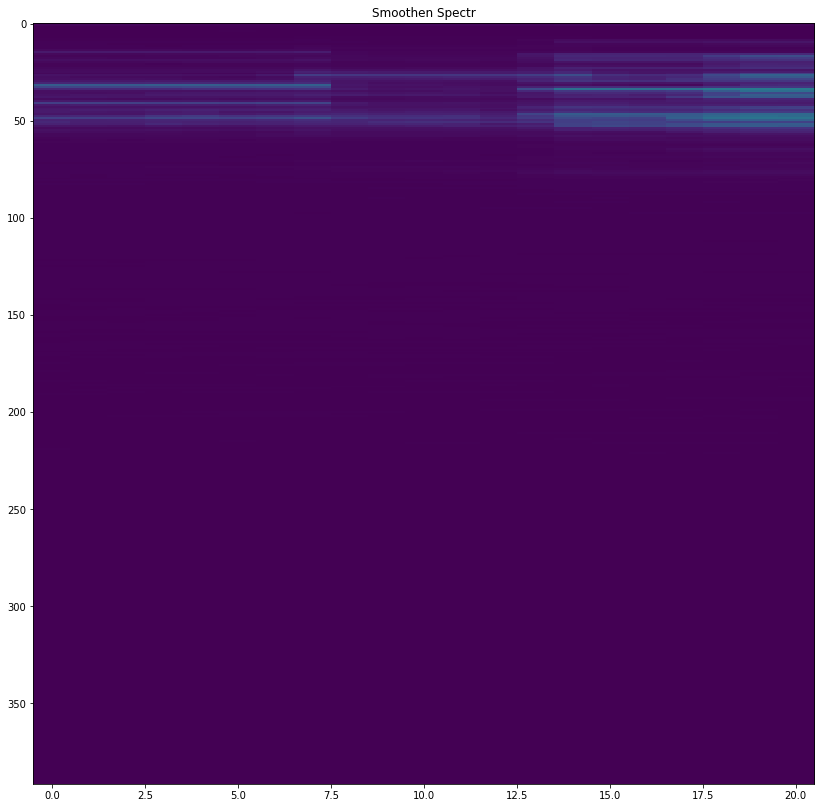

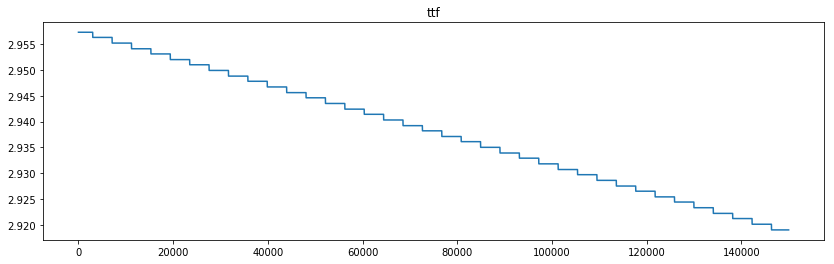

Wall time: 746 ms


In [6]:
%%time
plt.figure(figsize=(14,14))
plt.imshow(Sxx_s, vmax=0.001, origin='upper', aspect='auto')
plt.title("Spectr")
plt.show()

plt.figure(figsize=(14,14))
smoothen_s = signal.convolve2d(Sxx_s, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
smoothen_s = signal.convolve2d(smoothen_s, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
smoothen_s = signal.convolve2d(smoothen_s, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
plt.imshow(smoothen_s[:, :end], vmax=0.001, origin='upper', aspect='auto')
plt.title("Smoothen Spectr")
plt.show()
print(smoothen_s.shape)

plt.figure(figsize=(14,4))
plt.plot(sample_ttf.values)
plt.title('ttf')
plt.show()

## Generate new DataFrame